In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, RocCurveDisplay

In [2]:
df = pd.read_csv("train.csv")

In [3]:
num_features = ["Age","Fare"]
cat_features = ["Pclass","Sex","SibSp","Parch","Embarked"]

In [4]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [5]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [6]:
X = df.drop(columns=["PassengerId","Name","Ticket","Cabin","Survived"])
y = df["Survived"]

In [7]:
X = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Survived"])
y = df["Survived"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

pipeline_dt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

In [11]:
pipeline_lr.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Embarked'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [12]:
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)

In [14]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

In [15]:
print("Without Cross-Validation:")
print(f"Logistic Regression - Accuracy: {accuracy_lr:.2f}, Precision: {precision_lr:.2f}, Recall: {recall_lr:.2f}")
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}")

Without Cross-Validation:
Logistic Regression - Accuracy: 0.79, Precision: 0.78, Recall: 0.70
Decision Tree - Accuracy: 0.77, Precision: 0.73, Recall: 0.72


# With Cross Validation

In [16]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
cv_accuracy_lr = cross_val_score(pipeline_lr, X, y, cv=kfold, scoring='accuracy').mean()
cv_precision_lr = cross_val_score(pipeline_lr, X, y, cv=kfold, scoring='precision').mean()
cv_recall_lr = cross_val_score(pipeline_lr, X, y, cv=kfold, scoring='recall').mean()

In [18]:
cv_accuracy_dt = cross_val_score(pipeline_dt, X, y, cv=kfold, scoring='accuracy').mean()
cv_precision_dt = cross_val_score(pipeline_dt, X, y, cv=kfold, scoring='precision').mean()
cv_recall_dt = cross_val_score(pipeline_dt, X, y, cv=kfold, scoring='recall').mean()

In [19]:
print("\nWith Cross-Validation:")
print(f"Logistic Regression - Accuracy: {cv_accuracy_lr:.2f}, Precision: {cv_precision_lr:.2f}, Recall: {cv_recall_lr:.2f}")
print(f"Decision Tree - Accuracy: {cv_accuracy_dt:.2f}, Precision: {cv_precision_dt:.2f}, Recall: {cv_recall_dt:.2f}")


With Cross-Validation:
Logistic Regression - Accuracy: 0.81, Precision: 0.77, Recall: 0.71
Decision Tree - Accuracy: 0.77, Precision: 0.69, Recall: 0.71


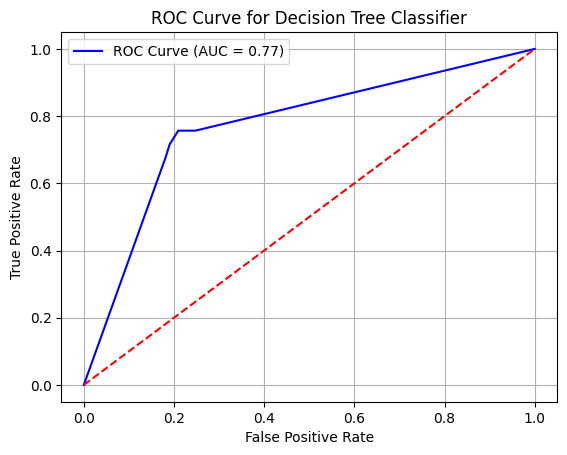

In [21]:
import matplotlib.pyplot as plt
y_probs_dt = pipeline_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='best')
plt.grid()